**IMPORTING NECESSARY LIBRARIES**

In [1]:
# Importing NLTK Stopwords and Punkt tokenizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Importing libraries for data manipulation, visualization, and text processing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**DATA LOADING AND EXPLORATION**

In [2]:
# Load IMDB Movie Reviews dataset
movie_reviews = pd.read_csv('/content/IMDB Dataset.csv')
movie_reviews

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
# Display the first few rows of the dataset
print("Dataset Head:")
print(movie_reviews.head())

Dataset Head:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [4]:
# Display dataset shape (rows, columns) to understand its size
print("Dataset Shape:", movie_reviews.shape)

Dataset Shape: (50000, 2)


In [5]:
# Display column info, checking for nulls and data types
movie_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


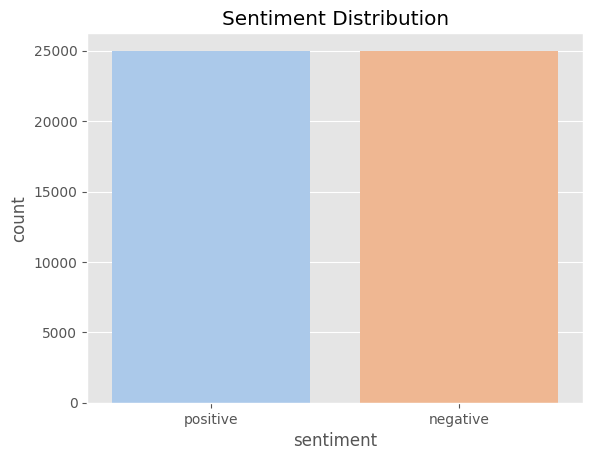

In [6]:
# Visualizing Sentiment Distribution
# Plot distribution of positive and negative sentiments in the dataset
sns.countplot(x='sentiment', hue='sentiment', data=movie_reviews, palette='pastel', legend=False)
plt.title("Sentiment Distribution")
plt.show()

In [7]:
# Display Sample Reviews with Corresponding Sentiments
# Print a few examples of reviews along with their sentiments for context
print("Sample Reviews and Sentiments:")
for i in range(5):
    print(f"Review {i+1}:")
    print(movie_reviews['review'].iloc[i])
    print("Sentiment:", movie_reviews['sentiment'].iloc[i], "\n")

Sample Reviews and Sentiments:
Review 1:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the 

In [8]:
# Adding a Word Count Column
# Function to calculate the number of words in each review
def no_of_words(text):
    words = text.split()
    word_count = len(words)
    return word_count

In [9]:
# Apply word count function to reviews and create a new 'word_count' column
movie_reviews['word_count'] = movie_reviews['review'].apply(no_of_words)

In [10]:
# Display the first few rows Based on Sentiment Analysis with Word Count
movie_reviews.head()

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


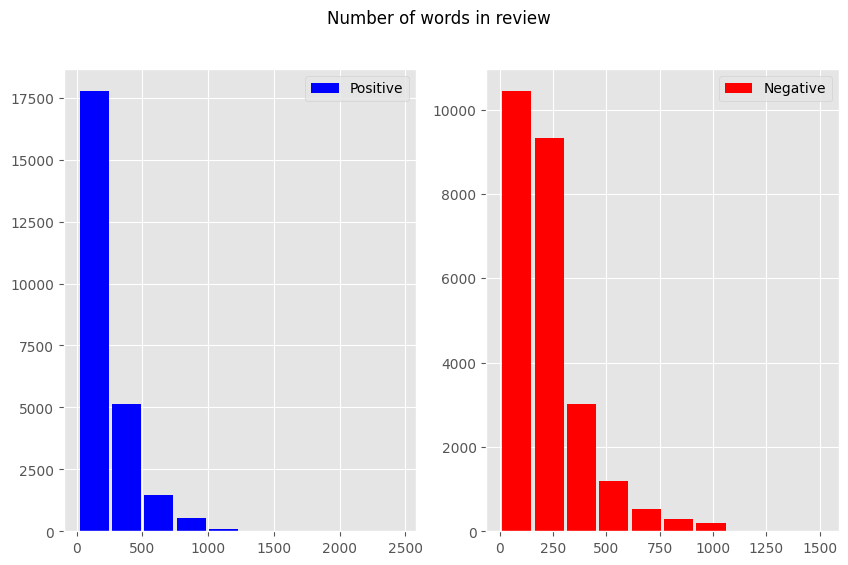

In [13]:
# Plot Word Count Distribution by Sentiment
# Visualize the word count for positive and negative reviews separately
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(movie_reviews[movie_reviews['sentiment'] == 'positive']['word_count'], label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(movie_reviews[movie_reviews['sentiment'] == 'negative']['word_count'], label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

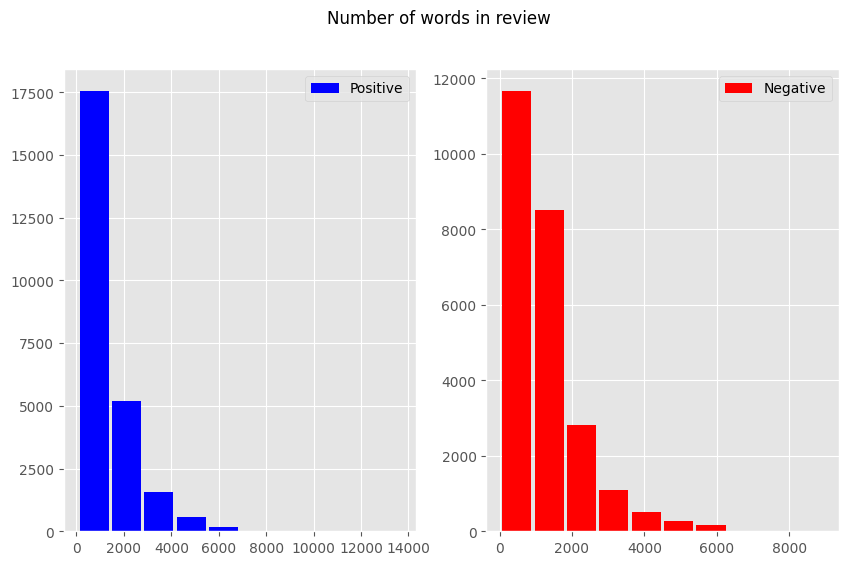

In [15]:
# Plot Word Count Distribution by Sentiment
# Visualize The Number Of Words In Each Review Based on Sentiment
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(movie_reviews[movie_reviews['sentiment'] == 'positive']['review'].str.len(), label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(movie_reviews[movie_reviews['sentiment'] == 'negative']['review'].str.len(), label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

In [ ]:
# Converting Sentiment Labels to Numeric Values for Model Input
movie_reviews.sentiment.replace("positive", 1, inplace=True)
movie_reviews.sentiment.replace("negative", 0, inplace=True)

<ipython-input-129-a0a943343702>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie_reviews.sentiment.replace("positive", 1, inplace=True)
<ipython-input-129-a0a943343702>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
# Display the first few rows Based on Sentiment Analysis with Word Count
movie_reviews.head()

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


**DATA PREPROCESSING**

In [ ]:
# Data Preprocessing: Cleaning the Text
# Text cleaning function: convert to lowercase, remove URLs, HTML tags, non-alphanumeric characters, and stop words
def data_processing(text):
    text = text.lower()  # Lowercase text
    text = re.sub('<br />', '', text)  # Remove HTML tags
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]','', text)  # Remove punctuation
    text_tokens = word_tokenize(text)  # Tokenize text
    filtered_text = [w for w in text_tokens if not w in stop_words]  # Remove stopwords
    return " ".join(filtered_text)

In [ ]:
# Apply data processing to each review
movie_reviews['review'] = movie_reviews['review'].apply(data_processing)

In [ ]:
# Identifying Duplicate Entries in the Movie Reviews Dataset
duplicated_count = movie_reviews.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  421


In [ ]:
# Drop Duplicate Reviews
# Check and remove duplicate entries to ensure uniqueness
movie_reviews = movie_reviews.drop_duplicates('review')
movie_reviews.reset_index(inplace=True)

In [ ]:
# Identifying Duplicate Entries in the Movie Reviews Dataset
duplicated_count = movie_reviews.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  0


In [ ]:
# Text Stemming
# Function to apply stemming, reducing words to their root form
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data.split()]
    return " ".join(text)

In [ ]:
# Apply stemming to each review
movie_reviews.review = movie_reviews['review'].apply(lambda x: stemming(x))

<ipython-input-137-84b8901587bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_reviews.review = movie_reviews['review'].apply(lambda x: stemming(x))


In [ ]:
# Adding Word Count Column to Movie Reviews Dataset
movie_reviews['word count'] = movie_reviews['review'].apply(no_of_words)
# Display the first few rows Based On Adding Word Count Column
movie_reviews.head()

<ipython-input-138-cbb80c9c3cb7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_reviews['word count'] = movie_reviews['review'].apply(no_of_words)


,index,review,sentiment,word_count,word count
0,0,one review mention watch 1 oz episod youll hoo...,1,307,168
1,1,wonder littl product film techniqu unassum old...,1,162,84
2,2,thought wonder way spend time hot summer weeke...,1,166,86
3,3,basic there famili littl boy jake think there ...,0,138,67
4,4,petter mattei love time money visual stun film...,1,230,125


**EXPLORATORY DATA ANALYSIS (EDA)**

In [ ]:
# Positive Reviews Word Cloud
pos_reviews = movie_reviews[movie_reviews['sentiment'] == 1]
# Display the first few rows Based On Filtering Positive Reviews
pos_reviews.head()

,index,review,sentiment,word_count,word count
0,0,one review mention watch 1 oz episod youll hoo...,1,307,168
1,1,wonder littl product film techniqu unassum old...,1,162,84
2,2,thought wonder way spend time hot summer weeke...,1,166,86
4,4,petter mattei love time money visual stun film...,1,230,125
5,5,probabl alltim favorit movi stori selfless sac...,1,119,58


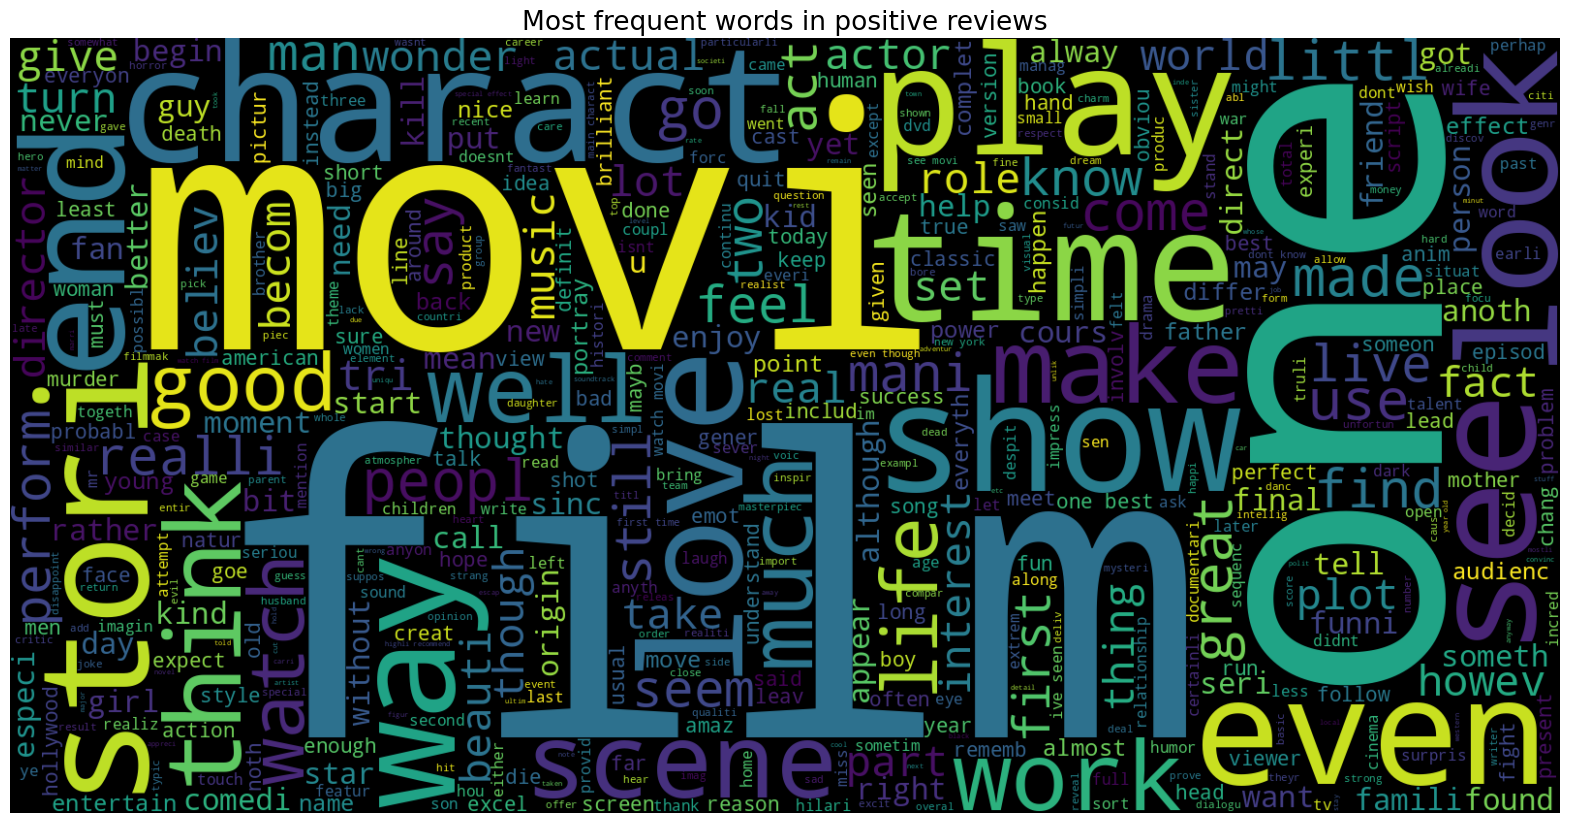

In [ ]:
# Word Cloud Visualization for Positive and Negative Reviews
# Create word clouds for positive and negative reviews

# Change 'positive' to 1 to match the sentiment values in the DataFrame
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [ ]:
# Frequency Analysis of Words in Positive Reviews
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 48842),
 ('movi', 42888),
 ('one', 26837),
 ('like', 19811),
 ('time', 15400),
 ('see', 14626),
 ('good', 14502),
 ('stori', 13606),
 ('charact', 13566),
 ('make', 13114),
 ('great', 12719),
 ('get', 12527),
 ('watch', 12425),
 ('love', 12014),
 ('well', 11258)]

In [ ]:
# Top 15 Most Frequent Positive Words in Review
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
# Display the first few rows Based On Frequent Positive Words in Review
pos_words.head()

,word,count
0,film,48842
1,movi,42888
2,one,26837
3,like,19811
4,time,15400


In [ ]:
# Bar Plot of Common Words in Positive Reviews
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color='word')

In [ ]:
# Filtering Negative Reviews
neg_reviews = movie_reviews[movie_reviews.sentiment == 0]
# Display the first few rows Based On Negative Reviews Word Count
neg_reviews.head()

,index,review,sentiment,word_count,word count
3,3,basic there famili littl boy jake think there ...,0,138,67
7,7,show amaz fresh innov idea 70 first air first ...,0,174,83
8,8,encourag posit comment film look forward watch...,0,130,64
10,10,phil alien one quirki film humour base around ...,0,96,51
11,11,saw movi 12 came recal scariest scene big bird...,0,180,84


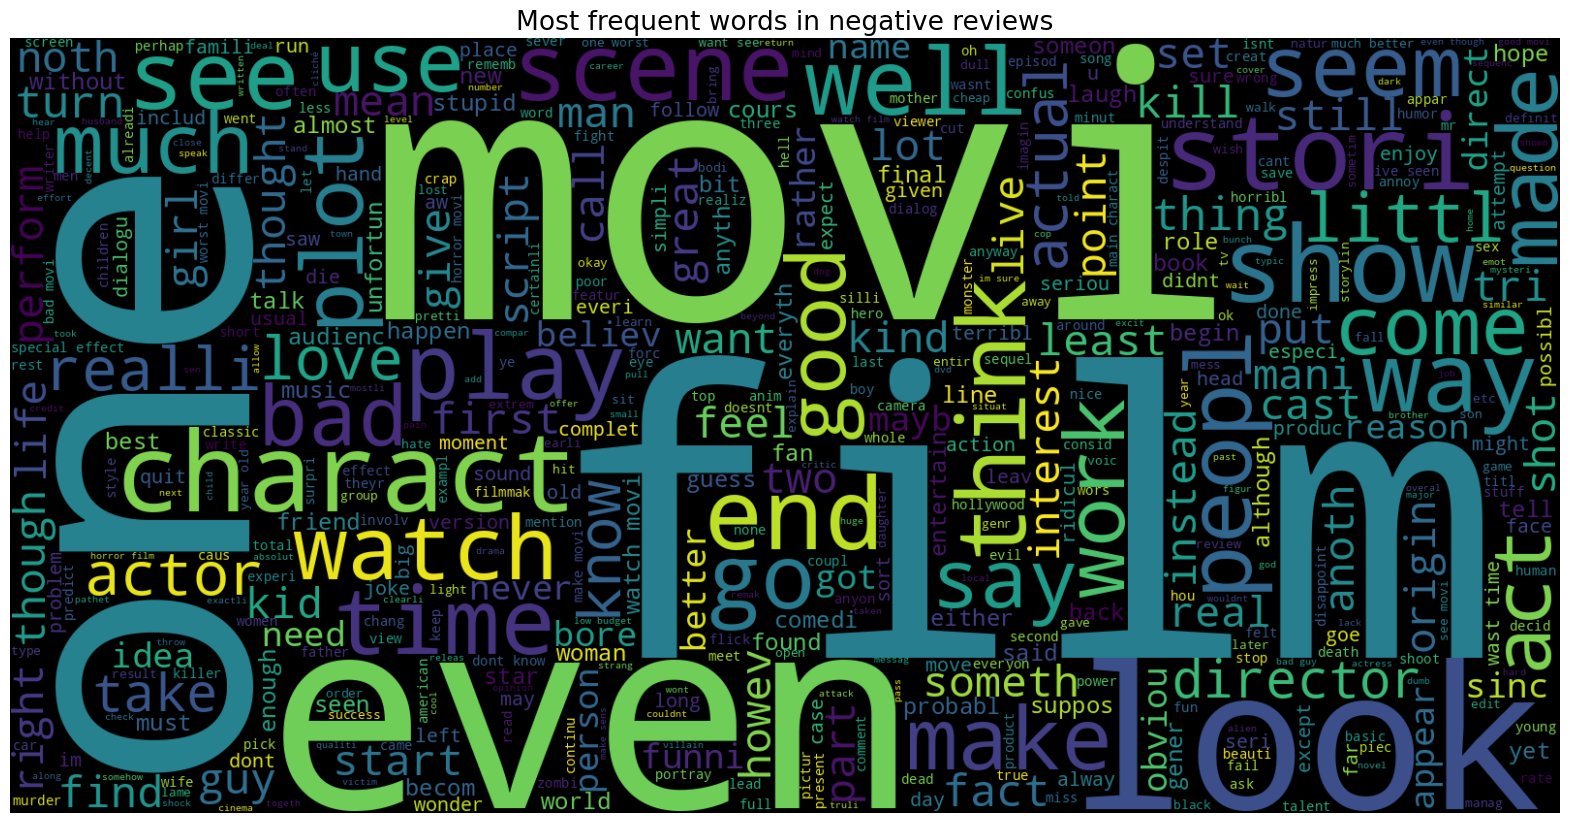

In [ ]:
# Negative Reviews Word Cloud
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [ ]:
# Top 15 Most Common Words in Negative Reviews
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] += 1
count.most_common(15)

[('movi', 55289),
 ('film', 42590),
 ('one', 25414),
 ('like', 23647),
 ('make', 15262),
 ('get', 14969),
 ('even', 14933),
 ('watch', 14382),
 ('good', 14190),
 ('time', 14149),
 ('bad', 13963),
 ('charact', 13773),
 ('would', 13482),
 ('see', 12707),
 ('realli', 12085)]

In [ ]:
# Top 15 Most Frequent Words in Negative Reviews
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
# Display the first few rows Based On Negative Reviews Word And Count
neg_words.head()

,word,count
0,movi,55289
1,film,42590
2,one,25414
3,like,23647
4,make,15262


In [ ]:
# Most Frequent Words in Negative Reviews
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color='word')

**TEXT VECTORIZATION**

In [ ]:
# Transform text data into numerical format using TF-IDF
X = movie_reviews['review']
Y = movie_reviews['sentiment'].replace({"positive": 1, "negative": 0})  # Convert sentiment to binary (1 for positive, 0 for negative)

In [ ]:
# Text Vectorization Using TF-IDF for Sentiment Analysis
vect = TfidfVectorizer()
X = vect.fit_transform(movie_reviews['review'])

**SPLITTING THE DATASET**

In [ ]:
# Split Data into Train and Test Sets
# Split the data: 70% training, 30% testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
# Checking the Dimensions of Training and Testing Data
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (34704, 181877)
Size of y_train:  (34704,)
Size of x_test:  (14874, 181877)
Size of y_test:  (14874,)


In [ ]:
# Data Subsampling for Training and Testing Sets
x_train = x_train[:2000]
y_train = y_train[:2000]
x_test = x_test[:500]
y_test = y_test[:500]

In [ ]:
# Displaying the Shapes of Training and Testing Data Sets
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (2000, 181877)
Size of y_train:  (2000,)
Size of x_test:  (500, 181877)
Size of y_test:  (500,)


In [ ]:
# Converting Text Data to Numerical Format using CountVectorizer (or TF-IDF)
x_train = x_train.toarray()
x_test = x_test.toarray()

**BUILDING AND TRAINING NEURAL NETWORK  - MODEL 1 (RMSPROP OPTIMIZER)**


In [ ]:
# Building a Simple Neural Network for Binary Classification
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
# Compiling the Model with RMSprop Optimizer and Binary Crossentropy Loss
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Training the Model
history = model.fit(x_train, y_train, batch_size=10, epochs=15)

Epoch 1/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.6669 - loss: 0.6802
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9091 - loss: 0.5185
Epoch 3/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9474 - loss: 0.3051
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9636 - loss: 0.1600
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9800 - loss: 0.0889
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9912 - loss: 0.0492
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9923 - loss: 0.0312
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9976 - loss: 0.0168
Epoch 9/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9977 - loss: 0.0095
Epoch 10/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9989 - loss: 0.0061
Epoch 11/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9975 - loss: 0.0092
Epoch 12/15
200/200 ━━━━━━━━━━━━━━━━━━

In [ ]:
# Displaying Architecture and Parameters
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │       2,910,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,820,388 (22.20 MB)

 Trainable params: 2,910,193 (11.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,910,195 (11.10 MB)

**EVALUATING THE MODELS AND RESULTS INTERPRETATION**

In [ ]:
# Model Evaluation
# Evaluate model performance on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss (Model 1):', test_loss)
print('Test Accuracy (Model 1):', test_acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8568 - loss: 0.4955
Test Loss (Model 1): 0.5036895871162415
Test Accuracy (Model 1): 0.8479999899864197


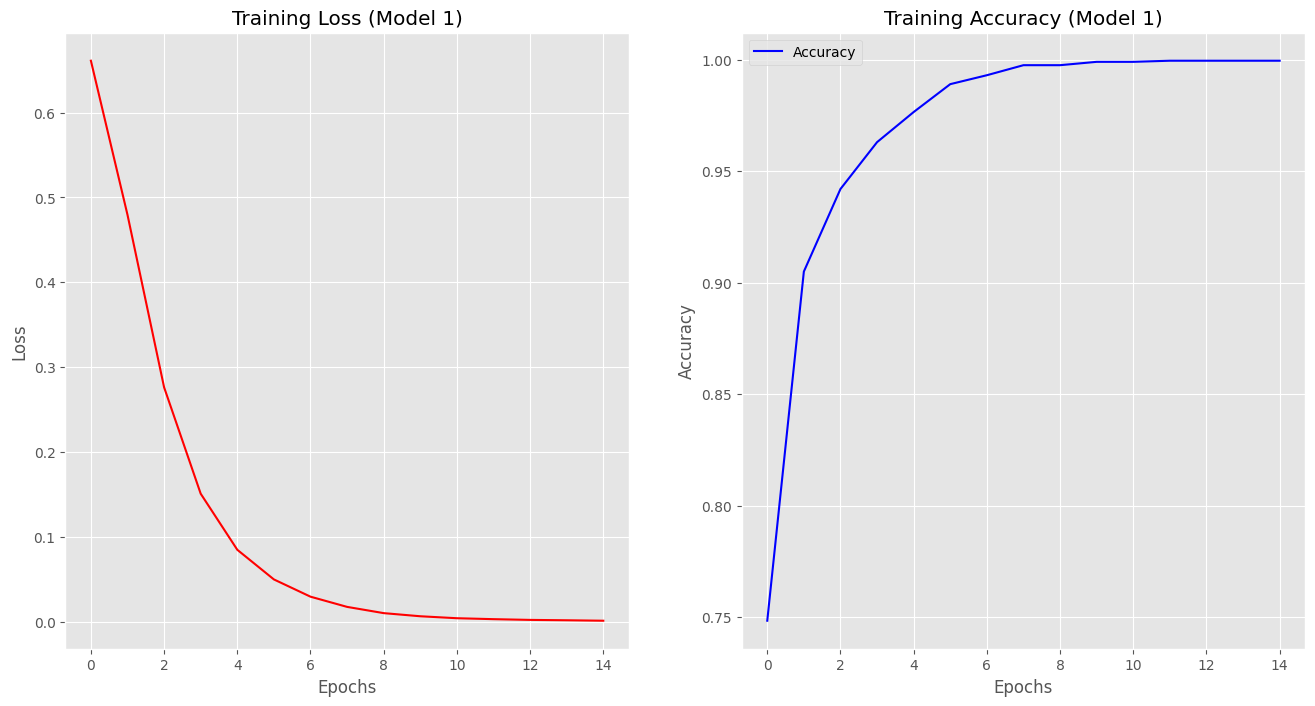

In [ ]:
# Training Performance Visualization - Model 1
# Plot training loss and accuracy
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='r', label='Loss')
plt.title('Training Loss (Model 1)')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='b', label='Accuracy')
plt.title('Training Accuracy (Model 1)')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Neural Network Model - Model 2 (Adam Optimizer)
# Building a second neural network with Adam optimizer for comparison
model_2 = Sequential()
model_2.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))
model_2.add(Dense(units=8, activation='relu'))
model_2.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# Compiling the Model with Adam Optimizer and Binary Cross-Entropy Loss
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Training the Model
history_1 = model_2.fit(x_train, y_train, batch_size=10, epochs=15)

Epoch 1/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.6831 - loss: 0.6758
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.9529 - loss: 0.3737
Epoch 3/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9932 - loss: 0.0895
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9998 - loss: 0.0249
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 1.0000 - loss: 0.0111
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 1.0000 - loss: 0.0056
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 1.0000 - loss: 0.0035
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 1.0000 - loss: 0.0024
Epoch 9/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 1.0000 - loss: 0.0016
Epoch 10/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 1.0000 - loss: 0.0012
Epoch 11/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 1.0000 - loss: 8.8263e-04
Epoch 12/15
200/200 ━━━━━━━━━━━━━

In [ ]:
# Displaying Architecture and Parameters
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │       2,910,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,820,388 (22.20 MB)

 Trainable params: 2,910,193 (11.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,910,195 (11.10 MB)

In [ ]:
# Model Evaluation - Model 2
# Evaluate the second model's performance on the test set
test_loss, test_acc = model_2.evaluate(x_test, y_test)
print('Test Loss (Model 2):', test_loss)
print('Test Accuracy (Model 2):', test_acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8397 - loss: 0.4126
Test Loss (Model 2): 0.4447636306285858
Test Accuracy (Model 2): 0.8420000076293945


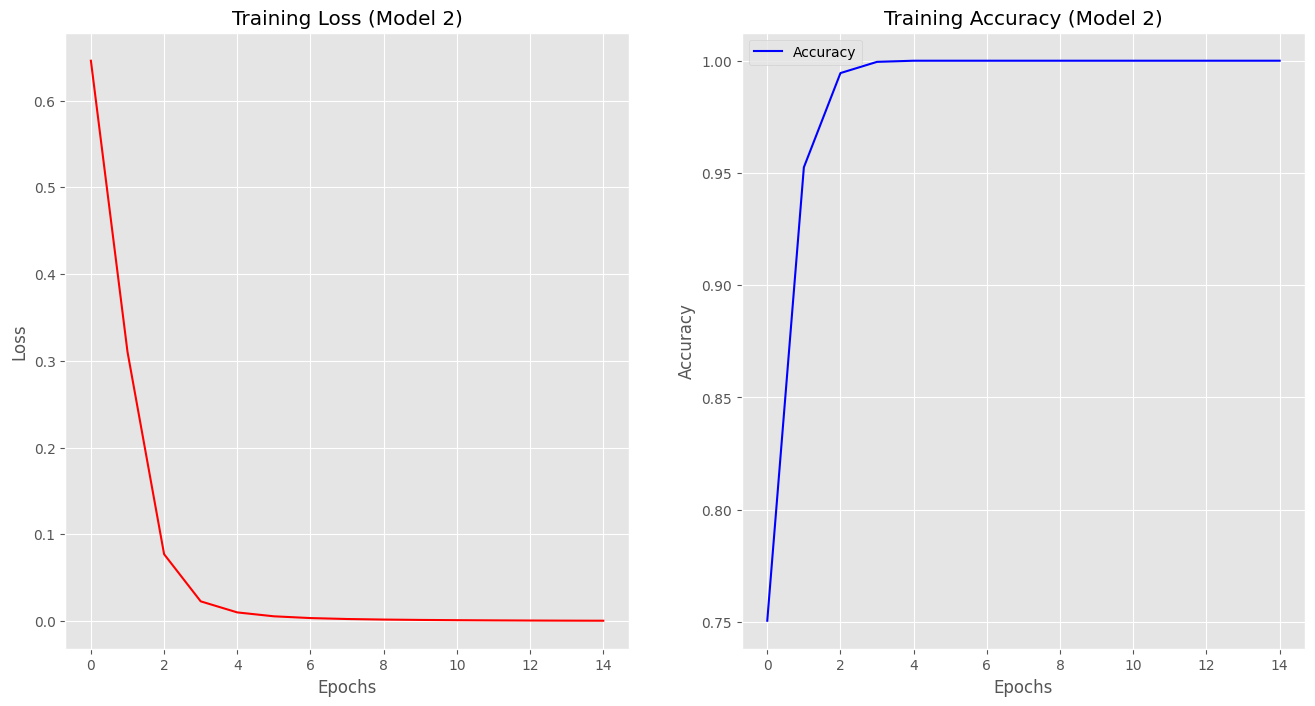

In [ ]:
# Training Performance Visualization - Model 2
# Plot training loss and accuracy for the second model
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], color='r', label='Loss')
plt.title('Training Loss (Model 2)')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.subplot(1, 2, 2)
plt.plot(history_1.history['accuracy'], color='b', label='Accuracy')
plt.title('Training Accuracy (Model 2)')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()